In [1]:
g = [1,2,3,4,5,6,7,8,-180,60,-155,-154,-153,-152,190,191,192,193,-110,-109,-108,-99,-98,-97,-96,
     85,86,87,88,89,90,91,92,93,94,95,-84,-131,-130,-129,-128,-157,-156,61,62,63,-53,-52,32,33,34,
     177,178,-137,-136,-135,-134,-133,-132,-83,-82,-81,-80,-79,-78,-102,-164,-163,-40,103,104,-199,
     -198,-197,-196,-195,-194,111,112,179,-183,-45,-118,-51,-50,-49,-48,-47,-46,101,-175,-174,165,
     166,167,168,169,170,171,172,173,176,35,-127,-126,-125,-124,-123,-122,-121,-120,-119,-44,-43,
     -42,25,26,27,140,141,142,143,144,145,146,147,148,-21,-20,-19,-139,-138,113,114,115,116,117,-31,
     -30,158,159,160,161,162,41,-24,-23,-22,149,150,151,-189,-188,75,76,77,-39,-38,-37,-36,-29,-28,-18,
     -17,-16,-15,-14,-13,-12,-11,-10,185,186,187,-74,-73,-72,-71,-70,-69,-68,-67,-66,-65,-64,54,55,56,57,
     58,59,184,-9,181,182,-100,-107,-106,-105,200];
g2 = [1,2,3,4,88,-161,-160,-159,-158,-157,-156,-155,-154,-153,-152,190,178,113,114,87,5,6,7,8,9,10,11,12,13,
      14,15,16,17,168,169,170,171,79,80,81,82,83,84,85,86,115,116,-90,-89,162,163,164,-173,-172,-78,-77,109,
      110,-193,-192,-191,-177,53,54,55,56,-24,-23,-22,149,150,151,-189,-188,75,76,-108,-107,-106,21,-148,-147,
      -146,-179,-112,-111,194,195,196,197,198,199,-39,-38,-37,-36,-35,-176,102,103,104,-121,28,29,-18,-167,-166,
      -165,174,175,-101,46,47,48,49,120,30,31,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,
      139,140,141,142,143,144,145,-183,-182,-181,-180,184,-25,42,43,44,45,-100,-99,-98,-97,95,96,-94,-93,-92,
      -91,117,118,119,50,51,52,-34,-33,-32,-122,105,-20,-19,-27,-26,185,186,187,-74,-73,-72,-71,-70,-69,-68,-67,
      -66,-65,-64,-63,-62,-61,-60,-59,-58,-57,-41,-40,200];
g3 = [1,2,-23,-22,149,150,-21,-20,-19,-67,-66,-65,-64,199,-39,-38,-37,-36,-35,-176,102,103,104,-121,-29,-110,
      -109,77,78,148,-187,-186,-185,26,27,68,69,70,71,72,73,74,151,12,13,14,15,177,178,113,114,115,116,-90,
      -89,162,163,164,193,-28,-18,91,92,93,40,41,-24,3,4,88,-161,-160,-159,-158,-157,-156,-155,-154,-153,
      -152,190,191,192,-173,-172,9,10,-179,-112,-111,194,195,196,32,33,34,87,5,6,7,-129,-128,-127,-126,-125,
      -124,-123,-31,-30,-120,-49,-48,-60,-59,-58,-57,-56,-55,-54,-53,136,-141,-140,-139,-138,-137,61,166,167,117,
      118,119,50,51,52,-86,-85,-84,181,182,183,-17,-16,-135,63,-198,-197,-122,105,106,107,108,-76,-75,188,189,
      -11,146,147,-42,25,-184,180,-83,-82,-81,-80,-79,142,143,144,145,168,169,170,171,-8,130,131,132,-46,101,-175,
      -174,165,62,-134,133,47,43,44,45,-100,-99,-98,-97,95,96,-94,200];


In [2]:
import numpy as np

In [3]:
def encodeAdj(genome):
    l = len(genome)
    adjacency = np.zeros(l*2 + 2, dtype=np.int32)
    adjacency[0] = 0

    for i in range(l):
        if genome[i] > 0:
            adjacency[i*2 + 1] = (genome[i] * 2 - 1)
            adjacency[i*2 + 2] = (genome[i] * 2)
        else:
            adjacency[i*2+1] = (genome[i] * 2 * (-1))
            adjacency[i*2+2] = (genome[i] * 2 * (-1) - 1)

    adjacency[l * 2 + 1] = -1
    return adjacency

In [4]:
A = encodeAdj([1])

In [5]:
B = encodeAdj([-1])

In [54]:
def neighbor(A, num):
    index = np.where(A == num)[0][0]
    if index % 2 == 0:
        index += 1
    else:
        index -= 1
    return A[index]

def travel(A, num, visted):
    nb = neighbor(A, num)
    if nb in visted:
        return True, 0
    if nb == 0 or nb == -1:
        return False, -1
    visted.append(nb)
    return False, nb

def getcp(A, B,):
    vistedA = []
    gl = [A, B]
    cycle = 0
    path = 0
    p = 0
    for i in range(1, len(A) - 1):
        if A[i] in vistedA:
            continue
        nb = A[i]
        if i % 2 == 0:
            p = 0
        vistedA.append(nb)
        t = 1
        while True:
            c,nb = travel(gl[t], nb, vistedA)
            if c:
                cycle += 1
                break
            p += 1
            if nb == -1:
                if (i % 2 == 1 or i == (len(A) - 2)) and p % 2 == 1:
                    path += 1
                break
            t = (t + 1) % 2
    return cycle, path

In [55]:
A = encodeAdj([1,2,3])
B = encodeAdj([1,2,3])

In [56]:
getcp(A,B)

(2, 2)

In [48]:
import random
res = random.sample(list(np.arange(1,10)), 9)

In [49]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
res

[7, 3, 9, 6, 2, 1, 5, 4, 8]

In [ ]:
for i in range(100):
    A = encodeAdj(random.sample(list(np.arange(1,4)), 3))
    B = encodeAdj(random.sample(list(np.arange(1,4)), 3))
    print(A)
    print(B)
    print(getcp(A,B))

In [93]:
def findPath(A, B, num, visited, path):
    if num in visited:
        return True
    if num == -1 or num == 0:
        return False
    
    visited.append(num)
    nb = neighbor(B, num)
    path.append((num, nb))
    return findPath(B, A, nb, visited, path)

def dcjPath(A, B):
    visited = []
    allpath = []
    cycle, oddp = 0, 0
    
    for i in range(1, len(A) - 1):
        if A[i] in visited:
            continue
        path = []
        if findPath(A, B, A[i], visited, path):
            cycle += 1
            allpath.append(path)
            continue
            
        nb = neighbor(A, A[i])
        if nb not in visited:
            findPath(A, B, nb, visited, path)
        path = [(nb, A[i])] + path
        if len(path) % 2 == 0:
            oddp += 1
        allpath.append(path)
        
    return cycle, oddp, allpath

In [64]:
A = encodeAdj(random.sample(list(np.arange(1,4)), 3))
B = encodeAdj(random.sample(list(np.arange(1,4)), 3))

In [65]:
A

array([ 0,  1,  2,  5,  6,  3,  4, -1], dtype=int32)

In [66]:
B

array([ 0,  1,  2,  3,  4,  5,  6, -1], dtype=int32)

In [94]:
dcjPath(A, B)

(0, 2, [[(0, 1), (1, 0)], [(5, 2), (2, 3), (3, 6), (6, -1), (5, 4), (4, -1)]])

In [95]:
dcjPath(A,A)

(2,
 2,
 [[(0, 1), (1, 0)], [(2, 5), (5, 2)], [(6, 3), (3, 6)], [(-1, 4), (4, -1)]])

In [190]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

import matplotlib.colors as mcolors

cl = list(mcolors.TABLEAU_COLORS.values())
linestyle_str = ['solid', 'dotted', 'dashed', 'dashdot']

In [219]:
def dcjPlot(A, B):
    c, p, dp = dcjPath(A, B)
    nodedist = 0.1
    
    colorlist = {}
    linelist = {}
    for x in dp:
        cname = random.sample(cl, 1)[0]
        lname = random.sample(linestyle_str, 1)[0]
        for m,n in x:
            colorlist[m] = cname
            colorlist[n] = cname
            linelist[m] = lname
            linelist[n] = lname

    figure(num=None, figsize=(40, 8))

    size = len(A)//2
    T = []
    for x in np.arange(1,size + 1):
        T.append(x - nodedist)
        T.append(x + nodedist)
    
    for i in range(len(A)):
        x = T[i]
        plt.scatter(x, 4, color = colorlist[B[i]])
        plt.annotate(B[i], (x, 4))
        plt.scatter(x, 5, color = colorlist[A[i]])
        plt.annotate(A[i], (x, 5))
    
    for i in range(1, len(A) - 1):
        x = T[i]        
        index = np.where(B == A[i])[0][0]
        y = T[index]
        plt.plot([x, y], [5, 4], color = colorlist[A[i]], linewidth = 2, linestyle = linelist[A[i]])
        
    for i in range(0, len(T), 2):
        plt.plot([T[i], T[i+1]], [4,4], color = colorlist[B[i]], linewidth = 2, linestyle = linelist[B[i]])
        plt.plot([T[i], T[i+1]], [5,5], color = colorlist[A[i]], linewidth = 2, linestyle = linelist[A[i]])

    plt.show()

In [209]:
size = 20
A = encodeAdj(random.sample(list(np.arange(1,size + 1)), size))
B = encodeAdj(random.sample(list(np.arange(1,size + 1)), size))

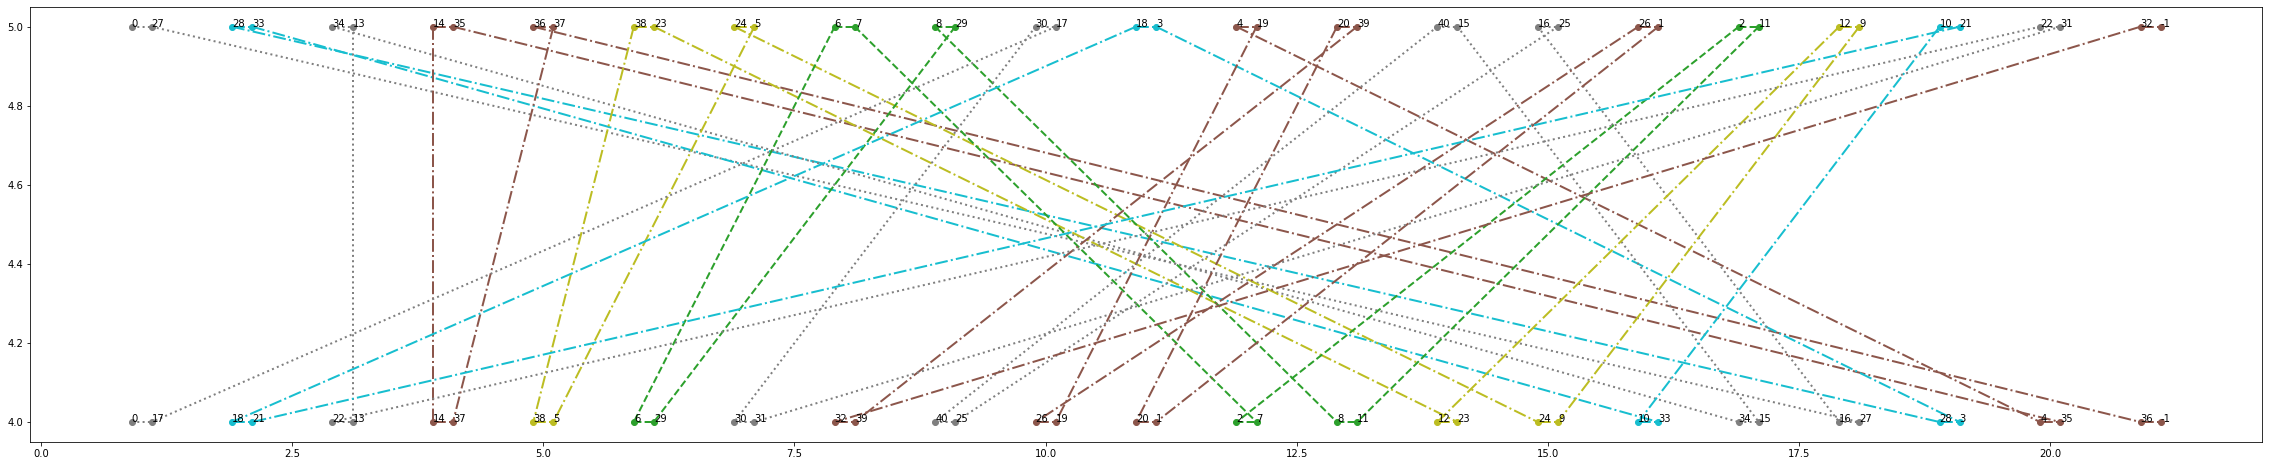

In [221]:
dcjPlot(A, B)

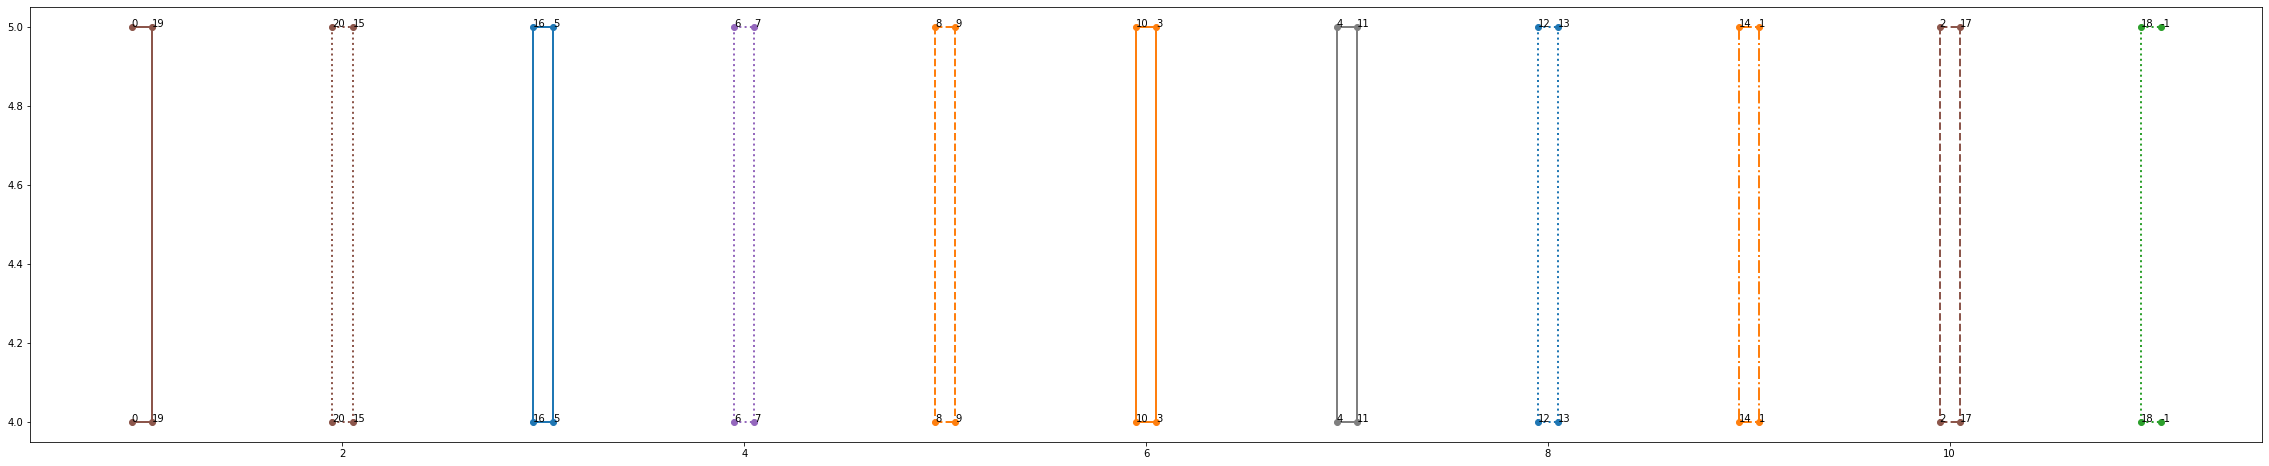

In [204]:
dcjPlot(A,A)